# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_safari, load_cifar10
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
RUN_ID = '0024'
RUN_FOLDER = os.path.join("./run", RUN_ID)
DATA_FOLDER = './data/celeb/'

BATCH_SIZE = 64
IMAGE_SIZE = 64

## data

In [3]:
data_gen = ImageDataGenerator(preprocessing_function=lambda x: (x.astype('float32') - 127.5) / 127.5)

x_train = data_gen.flow_from_directory(DATA_FOLDER
                                         , target_size = (IMAGE_SIZE,IMAGE_SIZE)
                                         , batch_size = BATCH_SIZE
                                         , shuffle = True
                                         , class_mode = 'input'
                                         , subset = "training"
                                            )



Found 202599 images belonging to 1 classes.


## architecture

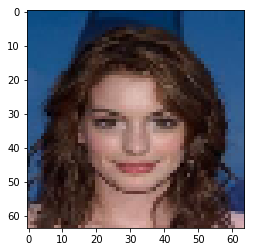

In [4]:
plt.imshow((x_train[0][0][0] + 1) *0.5)

In [5]:
print(np.min(x_train[0][0]))
print(np.max(x_train[0][0]))

-1.0
1.0


In [6]:


gan = WGAN(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = 0.9
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [2,2,2,2]
        , generator_conv_filters = [256,128, 64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

gan.save(RUN_FOLDER)




In [7]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [8]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
__________

In [9]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_4 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
__________

## training

In [14]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 5
    , n_critic = 5
    , large_it_critic = 10
    , large_n_critic = 5
    , clip_threshold = 0.01
    , using_generator = True
)

122 (5, 1) [D loss: (-0.032)(R -0.060, F 0.028)]  [G loss: -0.019] 
123 (5, 1) [D loss: (-0.023)(R -0.057, F 0.034)]  [G loss: -0.024] 
124 (5, 1) [D loss: (-0.029)(R -0.055, F 0.026)]  [G loss: -0.021] 
125 (5, 1) [D loss: (-0.026)(R -0.058, F 0.032)]  [G loss: -0.019] 
126 (5, 1) [D loss: (-0.030)(R -0.058, F 0.028)]  [G loss: -0.016] 
127 (5, 1) [D loss: (-0.038)(R -0.059, F 0.021)]  [G loss: -0.017] 
128 (5, 1) [D loss: (-0.038)(R -0.057, F 0.019)]  [G loss: -0.017] 
129 (5, 1) [D loss: (-0.014)(R -0.061, F 0.048)]  [G loss: -0.034] 
130 (5, 1) [D loss: (-0.008)(R -0.061, F 0.053)]  [G loss: -0.041] 
131 (5, 1) [D loss: (-0.007)(R -0.061, F 0.055)]  [G loss: -0.042] 
132 (5, 1) [D loss: (-0.016)(R -0.063, F 0.048)]  [G loss: -0.039] 
133 (5, 1) [D loss: (-0.015)(R -0.063, F 0.047)]  [G loss: -0.039] 
134 (5, 1) [D loss: (-0.024)(R -0.068, F 0.044)]  [G loss: -0.042] 
135 (5, 1) [D loss: (-0.013)(R -0.068, F 0.056)]  [G loss: -0.044] 
136 (5, 1) [D loss: (-0.036)(R -0.074, F 0.038)]

KeyboardInterrupt: 

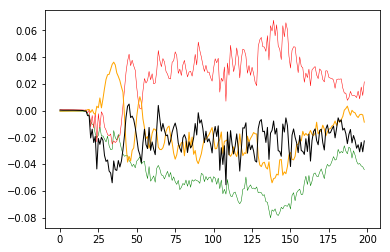

In [15]:
plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot(gan.g_losses, color='orange', linewidth=1)

plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=1)
